# iDENTify Experiment Notebook

## Dependencies

In [4]:
import pandas as pd #we use pandas to import our data and to explore it
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Experiment Settings
> These are all the variables that need to be chagned to get notebook to run on anyone's computer

In [5]:
raw_test_data='drugsComTest_raw.tsv'
raw_train_data='drugsComTrain_raw.tsv'

## Data collection

This is from Kaggle: 

<https://www.kaggle.com/datasets/jessicali9530/kuc-hackathon-winter-2018?select=drugsComTrain_raw.csv>
 or from UCI
<https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29>


In [6]:
test_data=pd.read_csv(raw_test_data, delimiter='\t')
train_data=pd.read_csv(raw_train_data, delimiter='\t')

In [7]:
test_data.size

376362

In [8]:
train_data.size

1129079

In [9]:
train_data.shape

(161297, 7)

In [10]:
test_data.describe()

,Unnamed: 0,rating,usefulCount
count,53766.000000,53766.000000,53766.000000
mean,116386.701187,6.976900,27.989752
std,67017.739881,3.285207,36.172833
min,0.000000,1.000000,0.000000
25%,58272.500000,4.000000,6.000000
50%,116248.500000,8.000000,16.000000
75%,174586.750000,10.000000,36.000000
max,232284.000000,10.000000,949.000000


(array([21619.,  6931.,  6513.,  5012.,  8013.,  6343.,  9456., 18890.,
        78520.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <BarContainer object of 9 artists>)

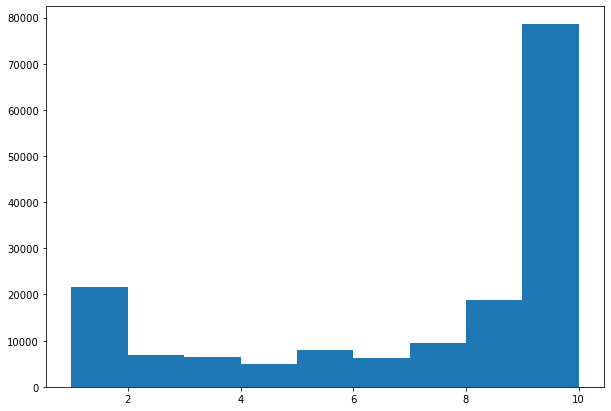

In [15]:
a=np.array(train_data['usefulCount'])
fig, ax=plt.subplots(figsize=(10, 7))
ax.hist(a, bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

(array([2.084e+03, 2.089e+03, 2.152e+03, 2.146e+03, 2.043e+03, 1.988e+03,
        1.781e+03, 1.675e+03, 1.570e+03, 1.477e+03, 1.399e+03, 1.273e+03,
        1.314e+03, 1.186e+03, 1.099e+03, 1.040e+03, 1.031e+03, 9.580e+02,
        9.030e+02, 8.790e+02, 8.080e+02, 7.960e+02, 8.140e+02, 7.530e+02,
        7.070e+02, 6.670e+02, 6.490e+02, 6.490e+02, 6.240e+02, 5.420e+02,
        4.990e+02, 5.080e+02, 5.180e+02, 5.240e+02, 4.830e+02, 4.530e+02,
        4.180e+02, 4.190e+02, 4.120e+02, 3.720e+02, 3.590e+02, 3.420e+02,
        3.550e+02, 3.640e+02, 3.020e+02, 3.140e+02, 3.080e+02, 2.950e+02,
        2.640e+02, 2.400e+02, 2.450e+02, 2.480e+02, 2.160e+02, 2.200e+02,
        2.100e+02, 2.630e+02, 1.860e+02, 1.820e+02, 2.000e+02, 2.180e+02,
        1.530e+02, 1.980e+02, 1.910e+02, 1.490e+02, 1.680e+02, 1.660e+02,
        1.370e+02, 1.330e+02, 1.560e+02, 1.530e+02, 1.470e+02, 1.080e+02,
        1.330e+02, 1.240e+02, 1.190e+02, 1.310e+02, 1.040e+02, 1.260e+02,
        1.030e+02, 1.130e+02, 1.140e+0

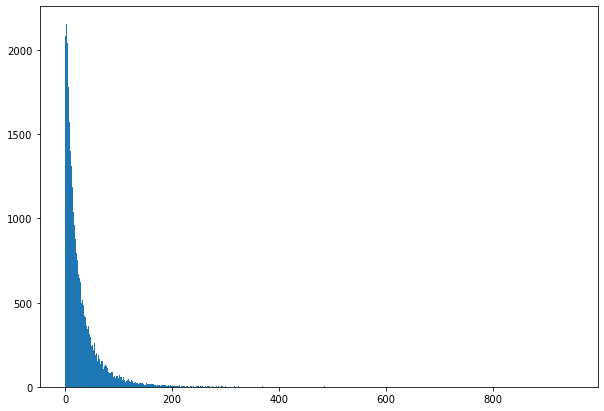

In [21]:
a2=np.array(test_data['usefulCount'])
fig, ax=plt.subplots(figsize=(10, 7))
ax.hist(a2, bins=[x*1 for x in range(np.max(test_data['usefulCount']))])

In [11]:
test_data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


#### What rows mention dentist?

In [29]:
dentist_rows=[row for row in test_data['review'] if 'gum' in row]
len(dentist_rows)

189

# Feature Extraction

#### Converting Drug Names to Numbers

In [51]:
test_drugs=[drug for drug in test_data['drugName']]
train_drugs=[drug for drug in train_data['drugName']]
all_drugs=test_drugs+train_drugs
drug_dict={}

i=0
for drug in set(all_drugs):
    drug_dict[drug]=i
    i+=1
drug_dict

{'Tesamorelin': 0,
 'Uristat': 1,
 'Aflibercept': 2,
 'Cubicin': 3,
 'Oseltamivir': 4,
 'Vitamin B12': 5,
 'Clinpro 5000': 6,
 'Aloxi': 7,
 'Potassium iodide': 8,
 'Jentadueto': 9,
 'Albendazole': 10,
 'Proleukin': 11,
 'Aubagio': 12,
 'Sustiva': 13,
 'Estring': 14,
 'Avandamet': 15,
 'Amitriptyline': 16,
 'Podophyllum resin': 17,
 'Promethazine': 18,
 'Rho (d) immune globulin': 19,
 'Quinine': 20,
 'Tramadol': 21,
 'Pyridostigmine': 22,
 'Linagliptin': 23,
 'Tracleer': 24,
 'Nuedexta': 25,
 'Cyclafem 1 / 35': 26,
 'Cepacol Dual Relief Sore Throat': 27,
 'Bisoprolol / hydrochlorothiazide': 28,
 'Visine Totality Multi-Symptom Relief': 29,
 'Cleocin HCl': 30,
 'Caduet': 31,
 'Labetalol': 32,
 'Bacitracin / neomycin / polymyxin b': 33,
 'Bismuth subcitrate potassium / metronidazole / tetracycline': 34,
 'Botox': 35,
 'Unisom SleepMelts': 36,
 'Acetaminophen / caffeine / pyrilamine': 37,
 'Rajani': 38,
 'Depo-Provera': 39,
 'Arsenic trioxide': 40,
 'Blisovi 24 Fe': 41,
 'Belladonna / opium

## Are there any reviews that mention the word 'dentist'?

In [44]:
ideal_columns = 'Person Drug Name Rating Age Gender Ethnicity dental procedure Will adverse drug reaction occur Details'.split('\t')
columnsideal_

NameError: name 'columnsideal_' is not defined

In [52]:
def create_identify_data_set(row):
    occur=0
    if 'bleeding' in row['review']:
        occur=1
    else:
        occur=0
    return{
        'Drug Name': drug_dict[row['drugName']],
        'Rating': row['rating'],
        'Will adverse drug reaction occur': occur
    }


In [53]:
arr=[]
for index, row in train_data.iterrows():
    arr.append(create_identify_data_set(row))

identify_train=pd.DataFrame(arr)
identify_train

,Drug Name,Rating,Will adverse drug reaction occur
0,2288,9.0,0
1,127,8.0,0
2,473,5.0,0
3,445,8.0,0
4,2306,9.0,0
...,...,...,...
161292,2258,10.0,0
161293,3196,1.0,0
161294,2275,2.0,0
161295,1713,10.0,0


In [46]:
arr=[]
for index, row in train_data.iterrows():
    arr.append(create_identify_data_set(row))

identify_test=pd.DataFrame(arr)
identify_test

,Drug Name,Rating,Will adverse drug reaction occur
0,Valsartan,9.0,0
1,Guanfacine,8.0,0
2,Lybrel,5.0,0
3,Ortho Evra,8.0,0
4,Buprenorphine / naloxone,9.0,0
...,...,...,...
161292,Campral,10.0,0
161293,Metoclopramide,1.0,0
161294,Orencia,2.0,0
161295,Thyroid desiccated,10.0,0
